<a href="https://colab.research.google.com/github/espressoD/Midterm-UTS-ML/blob/Assesment1/midterm_transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from google.colab import drive
drive.mount('/content/drive')

# Mengatur tampilan pandas agar semua kolom terlihat
pd.set_option('display.max_columns', None)

print("Library berhasil di-load.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Library berhasil di-load.


In [2]:
# Fungsi Ajaib untuk Mengecilkan Memori
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage awal: {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage akhir: {:.2f} MB'.format(end_mem))
    print('Berkurang sebanyak: {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

# --- PROSES LOAD DATA DENGAN HEMAT RAM ---

path = '/content/drive/MyDrive/Midterm ML/Assesment1/Fraud Transaction/'

# 1. Load Train & Kecilkan Langsung
print("Loading Train...")
train = pd.read_csv(path + 'train_transaction.csv')
train = reduce_mem_usage(train)

# 2. Ambil X dan y, lalu hapus variabel 'train'
y = train['isFraud']
X = train.drop(['isFraud', 'TransactionID'], axis=1)
del train  # Hapus dataframe besar dari RAM
gc.collect() # Panggil tukang sampah memori

# 3. Load Test & Kecilkan Langsung
print("Loading Test...")
test = pd.read_csv(path + 'test_transaction.csv')
test = reduce_mem_usage(test)

X_test_sub = test.drop(['TransactionID'], axis=1)
del test # Hapus dataframe besar
gc.collect()

print("Data siap! Ukuran RAM aman sekarang.")

Loading Train...
Memory usage awal: 1775.15 MB


/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning:

Memory usage akhir: 542.35 MB
Berkurang sebanyak: 69.4%
Loading Test...
Memory usage awal: 1519.24 MB


/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/tmp/ipython-input-3271979774.py:20: RuntimeWarning:

Memory usage akhir: 472.59 MB
Berkurang sebanyak: 68.9%
Data siap! Ukuran RAM aman sekarang.


In [3]:
# Cell 3: Preprocessing (Revisi Kompatibel dengan Hemat RAM)
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Pisahkan kolom berdasarkan tipe datanya
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # 1. Handling Missing Values
    # Isi dengan -999 untuk numerik
    df[numeric_cols] = df[numeric_cols].fillna(-999)

    # Isi dengan 'unknown' untuk kategorikal
    df[categorical_cols] = df[categorical_cols].fillna('unknown')

    # 2. Encoding (Ubah huruf ke angka)
    for col in categorical_cols:
        le = LabelEncoder()
        # Ubah ke string dulu untuk konsistensi
        df[col] = le.fit_transform(df[col].astype(str))

    return df

print("Memulai Preprocessing...")

# KITA HAPUS BAGIAN DEFINISI X, y, X_test_sub
# Karena variabel tersebut SUDAH ADA dari hasil Cell sebelumnya (Solusi 1)

# Langsung jalankan fungsi ke variabel yang sudah ada
X = preprocess_data(X)
X_test_sub = preprocess_data(X_test_sub)

# Pastikan kolom di X dan X_test_sub sama persis
common_cols = X.columns.intersection(X_test_sub.columns)
X = X[common_cols]
X_test_sub = X_test_sub[common_cols]

print("Preprocessing selesai.")

Memulai Preprocessing...
Preprocessing selesai.


In [4]:
# Cell 4: Splitting Data
from sklearn.model_selection import train_test_split

# Bagi data: 80% untuk Training, 20% untuk Validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y penting agar proporsi fraud di train dan val tetap sama

print(f"Jumlah Training: {len(X_train)}")
print(f"Jumlah Validasi: {len(X_val)}")

Jumlah Training: 472432
Jumlah Validasi: 118108


In [5]:
# Cell 5: Training Model
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi Model
# n_estimators: jumlah pohon (makin banyak makin bagus tapi lama)
# n_jobs=-1: gunakan semua core CPU
# class_weight='balanced': Otomatis menangani data fraud yang sedikit
model = RandomForestClassifier(n_estimators=100,
                               max_depth=10,
                               class_weight='balanced',
                               random_state=42,
                               n_jobs=-1,
                               verbose=1)

# Latih Model
print("Sedang melatih model... (Bisa 5-10 menit tergantung spek laptop/colab)")
model.fit(X_train, y_train)
print("Pelatihan selesai!")

Sedang melatih model... (Bisa 5-10 menit tergantung spek laptop/colab)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   47.8s


Pelatihan selesai!


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.1s finished


ROC-AUC Score: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    113975
           1       0.18      0.75      0.29      4133

    accuracy                           0.87    118108
   macro avg       0.58      0.81      0.61    118108
weighted avg       0.96      0.87      0.91    118108



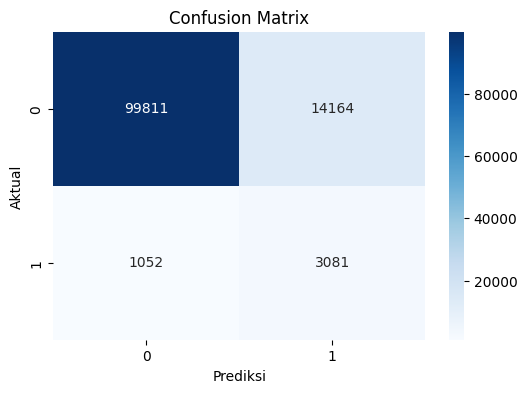

In [6]:
# Cell 6: Evaluasi
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Prediksi Probabilitas (bukan kelas 0/1)
y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred_class = model.predict(X_val)

# Hitung Score
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f"ROC-AUC Score: {auc_score:.4f}")

# Tampilkan Laporan Klasifikasi
print("\nClassification Report:")
print(classification_report(y_val, y_pred_class))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

In [7]:
# Cell 7: Generate Submission
print("Membuat prediksi untuk data Test...")
test_probs = model.predict_proba(X_test_sub)[:, 1]

submission = pd.DataFrame({
    'TransactionID': test['TransactionID'],
    'isFraud': test_probs
})

submission.to_csv('submission_midterm.csv', index=False)
print("File 'submission_midterm.csv' berhasil dibuat!")

Membuat prediksi untuk data Test...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.8s finished


NameError: name 'test' is not defined